In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

# 1.2.1
The 3 most counts of outgoing calls

In [2]:
call=pd.read_excel('phone_data.xlsx')
call.head()

,Date,Start time,From city,To city,Number called (to/from),Call type,Duration,Grand Total
0,10-14-2019,12:53:34 PM,INCOMING ON,TORONTO ON,Unknown caller,Incoming,1,0
1,10-13-2019,11:47:28 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,7,0
2,10-13-2019,11:46:53 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
3,10-13-2019,11:46:15 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
4,10-11-2019,07:03:08 PM,TORONTO ON,TORONTO ON,A_3,Outgoing,37,0


In [3]:
outgoing = call[call['Call type']=='Outgoing']
outgoing_amount = outgoing['Number called (to/from)'].value_counts()

counts_most = outgoing_amount.nlargest(3).to_frame(name = "counts of outgoing calls")
counts_most.reset_index(inplace=True)
counts_most.rename(columns = {'index':'numbers called'})

,numbers called,counts of outgoing calls
0,A_1,111
1,A_5,48
2,B_3,28


# 1.2.2
The least counts of outgoing calls

In [4]:
counts_least = outgoing_amount.nsmallest(1,keep='all').to_frame(name = "counts of outgoing calls")
counts_least.reset_index(inplace=True)
counts_least.rename(columns = {'index':'numbers called'})

,numbers called,counts of outgoing calls
0,F_2,1
1,F_4,1
2,F_3,1
3,E_5,1
4,F_5,1
5,F_1,1
6,D_2,1
7,E_4,1
8,D_5,1
9,D_1,1


# 1.3.1

In [5]:
outgoing_time = outgoing.groupby('Number called (to/from)').Duration.sum()

# top 3 outgoing duration per number
duration_most = outgoing_time.nlargest(3,keep='all').to_frame(name = "duration of outgoing calls")
duration_most.reset_index(inplace=True)
duration_most.rename(columns = {'Number called (to/from)':'numbers called'})

,numbers called,duration of outgoing calls
0,A_1,1146
1,A_5,427
2,A_4,96


In [6]:
# least outgoing duration
duration_least = outgoing_time.nsmallest(1,keep='all').to_frame(name = "duration of outgoing calls")
duration_least.reset_index(inplace=True)
duration_least.rename(columns = {'Number called (to/from)':'numbers called'})

,numbers called,duration of outgoing calls
0,C_1,1
1,D_5,1
2,E_4,1
3,E_5,1


# 1.4.1 
Number of counts for every location of outgoing calls

In [7]:
loc_counts = outgoing['From city'].value_counts().to_frame()
loc_counts.rename(columns = {'From city':'counts'})

,counts
TORONTO ON,244
NEWMARKET ON,2
CLAREMONT ON,1


# 1.5.1 
Total duration of incoming and outgoing calls per month.

In [8]:
get_month = call.copy()
get_month[['Month','date','year']] = get_month['Date'].str.split('-',expand =True)
get_month['Month']=get_month['Month'].astype(int)
get_month      #get the month column

,Date,Start time,From city,To city,Number called (to/from),Call type,Duration,Grand Total,Month,date,year
0,10-14-2019,12:53:34 PM,INCOMING ON,TORONTO ON,Unknown caller,Incoming,1,0,10,14,2019
1,10-13-2019,11:47:28 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,7,0,10,13,2019
2,10-13-2019,11:46:53 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0,10,13,2019
3,10-13-2019,11:46:15 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0,10,13,2019
4,10-11-2019,07:03:08 PM,TORONTO ON,TORONTO ON,A_3,Outgoing,37,0,10,11,2019
...,...,...,...,...,...,...,...,...,...,...,...
333,10-15-2019,11:41:22 AM,TORONTO ON,TORONTO ON,A_5,Outgoing,1,$0.00,10,15,2019
334,10-15-2019,11:11:44 AM,TORONTO ON,TORONTO ON,D_3,Outgoing,9,$0.00,10,15,2019
335,10-15-2019,11:06:17 AM,TORONTO ON,TORONTO ON,A_4,Outgoing,4,$0.00,10,15,2019
336,10-15-2019,11:05:05 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,1,$0.00,10,15,2019


In [9]:
# get the total durations of incoming and outgoing calls by month
incoming_month = get_month[get_month['Call type']=='Incoming'].groupby('Month').Duration.sum().to_frame()
outgoing_month = get_month[get_month['Call type']=='Outgoing'].groupby('Month').Duration.sum().to_frame()

# combine the durations of incoming and outgoing calls
combined = incoming_month.join(outgoing_month,lsuffix='_incoming',rsuffix='_outgoing') 
combined

,Duration_incoming,Duration_outgoing
Month,,
7,84,190
8,54,281
9,244,714
10,63,621
11,87,196


# 1.5.2 
Plot

<AxesSubplot:title={'center':'Duration by Month'}, xlabel='Month'>

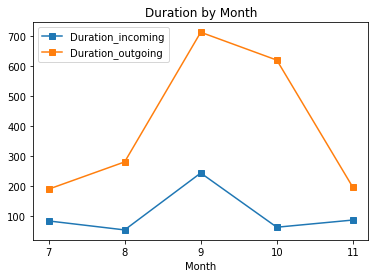

In [10]:
combined.plot(title="Duration by Month",style="-s",legend=True, xticks=combined.index)

# 1.5.3 
Anything unusual in the pattern?

In [11]:
# This is more like a criminal call, because the duration of outgoing calls increased hugely from August to
# October, and the duration of incmoing call also increased a lot in September.

# 1.6 
Plot the histogram of the outbound call counts; e.g. x-axis: the call counts per client called, y-axis: number of clients called.


Text(0.5, 1.0, 'number called counts')

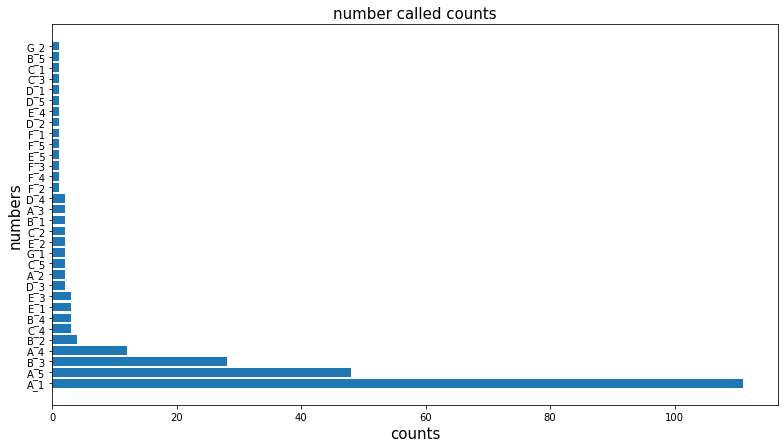

In [12]:
outgoing_df = pd.DataFrame(outgoing_amount).reset_index()
outgoing_df = outgoing_df.rename(columns = {'index':'numbers','Number called (to/from)':'counts'})

plt.figure(figsize=(13,7))
plt.barh(outgoing_df.numbers,outgoing_df.counts)
plt.ylabel('numbers',fontsize=15)
plt.xlabel('counts',fontsize=15)
plt.title('number called counts',fontsize=15)

# 2.3.1
Generate a pandas dataframe that simulates N coin tosses for w gamblers.

In [13]:
game_tem = pd.DataFrame(np.random.rand(100,100))   # N=100 coin tosses, w=100 gamblers
game_tem.index += 1 
game_tem.columns += 1
game_tem = game_tem.add_prefix('prob_').rename_axis('gambler_w',axis='rows').rename_axis('toss_N',axis='columns')
game_tem    

toss_N,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,prob_10,...,prob_91,prob_92,prob_93,prob_94,prob_95,prob_96,prob_97,prob_98,prob_99,prob_100
gambler_w,,,,,,,,,,,,,,,,,,,,,
1,0.971408,0.978619,0.850095,0.342825,0.768407,0.392676,0.590333,0.415693,0.007533,0.187535,...,0.596322,0.171163,0.494417,0.759601,0.034841,0.621974,0.019220,0.938873,0.248852,0.527613
2,0.148554,0.444627,0.983500,0.406556,0.577578,0.317175,0.826479,0.892966,0.389841,0.796557,...,0.998105,0.955666,0.732882,0.625131,0.679406,0.028354,0.987931,0.729909,0.476573,0.440251
3,0.866992,0.882218,0.691052,0.893298,0.966058,0.095318,0.026730,0.858469,0.021537,0.720340,...,0.239789,0.028601,0.574274,0.934002,0.224471,0.625326,0.476121,0.531603,0.198738,0.457589
4,0.821951,0.419606,0.739167,0.904389,0.870368,0.808843,0.299947,0.550917,0.902126,0.360876,...,0.603336,0.092399,0.803141,0.510246,0.122816,0.772853,0.028094,0.834475,0.183470,0.986651
5,0.495632,0.000268,0.297305,0.276278,0.247396,0.109505,0.985847,0.261626,0.289668,0.255978,...,0.100870,0.000038,0.683684,0.683589,0.984662,0.776244,0.072540,0.631336,0.157144,0.884094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.064468,0.294384,0.771262,0.321201,0.508186,0.155667,0.452523,0.428054,0.579401,0.772443,...,0.580070,0.428923,0.429591,0.107473,0.860095,0.420553,0.574823,0.778096,0.619479,0.093480
97,0.279436,0.147001,0.492233,0.569842,0.529369,0.391443,0.802097,0.860267,0.059891,0.851612,...,0.533210,0.525190,0.635680,0.579707,0.684594,0.232235,0.857171,0.125769,0.743020,0.347018
98,0.808164,0.989972,0.474745,0.375457,0.817904,0.903823,0.831755,0.801762,0.094498,0.581606,...,0.039708,0.222351,0.403461,0.576137,0.400131,0.658947,0.775997,0.349111,0.146421,0.728985


# 2.3.2
Capture the initial wealth of 100$ by adding balance columns of N=100 times.

In [14]:
game=game_tem.copy()
bal=['balance_'+ str(x) for x in range(1,101)]
game[bal]=100
game

toss_N,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,prob_10,...,balance_91,balance_92,balance_93,balance_94,balance_95,balance_96,balance_97,balance_98,balance_99,balance_100
gambler_w,,,,,,,,,,,,,,,,,,,,,
1,0.971408,0.978619,0.850095,0.342825,0.768407,0.392676,0.590333,0.415693,0.007533,0.187535,...,100,100,100,100,100,100,100,100,100,100
2,0.148554,0.444627,0.983500,0.406556,0.577578,0.317175,0.826479,0.892966,0.389841,0.796557,...,100,100,100,100,100,100,100,100,100,100
3,0.866992,0.882218,0.691052,0.893298,0.966058,0.095318,0.026730,0.858469,0.021537,0.720340,...,100,100,100,100,100,100,100,100,100,100
4,0.821951,0.419606,0.739167,0.904389,0.870368,0.808843,0.299947,0.550917,0.902126,0.360876,...,100,100,100,100,100,100,100,100,100,100
5,0.495632,0.000268,0.297305,0.276278,0.247396,0.109505,0.985847,0.261626,0.289668,0.255978,...,100,100,100,100,100,100,100,100,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.064468,0.294384,0.771262,0.321201,0.508186,0.155667,0.452523,0.428054,0.579401,0.772443,...,100,100,100,100,100,100,100,100,100,100
97,0.279436,0.147001,0.492233,0.569842,0.529369,0.391443,0.802097,0.860267,0.059891,0.851612,...,100,100,100,100,100,100,100,100,100,100
98,0.808164,0.989972,0.474745,0.375457,0.817904,0.903823,0.831755,0.801762,0.094498,0.581606,...,100,100,100,100,100,100,100,100,100,100


# 2.3.3

In [15]:
game['balance_0']=100          #set a temporary initial balance column with value 100
for w in game.index:           # for each row (gambler)
    for N in range(1,101):      #for each column(coin toss)
        if game.loc[w,'prob_'+str(N)]>=0.5:
            game.loc[w,'balance_'+str(N)]=1.5 * game.loc[w,'balance_'+str(N-1)]
        else:
            game.loc[w,'balance_'+str(N)]=0.6 * game.loc[w,'balance_'+str(N-1)]
            
game = game.drop('balance_0', axis=1)    #get rid of temporary balance_0
game

toss_N,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,prob_10,...,balance_91,balance_92,balance_93,balance_94,balance_95,balance_96,balance_97,balance_98,balance_99,balance_100
gambler_w,,,,,,,,,,,,,,,,,,,,,
1,0.971408,0.978619,0.850095,0.342825,0.768407,0.392676,0.590333,0.415693,0.007533,0.187535,...,0.523678,0.314207,0.188524,0.282786,0.169672,0.254507,0.152704,0.229057,0.137434,0.206151
2,0.148554,0.444627,0.983500,0.406556,0.577578,0.317175,0.826479,0.892966,0.389841,0.796557,...,8.182466,12.273699,18.410548,27.615822,41.423733,24.854240,37.281360,55.922040,33.553224,20.131934
3,0.866992,0.882218,0.691052,0.893298,0.966058,0.095318,0.026730,0.858469,0.021537,0.720340,...,8.182466,4.909480,7.364219,11.046329,6.627797,9.941696,5.965018,8.947526,5.368516,3.221110
4,0.821951,0.419606,0.739167,0.904389,0.870368,0.808843,0.299947,0.550917,0.902126,0.360876,...,12485.452034,7491.271220,11236.906831,16855.360246,10113.216148,15169.824221,9101.894533,13652.841799,8191.705080,12287.557619
5,0.495632,0.000268,0.297305,0.276278,0.247396,0.109505,0.985847,0.261626,0.289668,0.255978,...,0.013406,0.008044,0.012066,0.018098,0.027147,0.040721,0.024433,0.036649,0.021989,0.032984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.064468,0.294384,0.771262,0.321201,0.508186,0.155667,0.452523,0.428054,0.579401,0.772443,...,0.523678,0.314207,0.188524,0.113114,0.169672,0.101803,0.152704,0.229057,0.343585,0.206151
97,0.279436,0.147001,0.492233,0.569842,0.529369,0.391443,0.802097,0.860267,0.059891,0.851612,...,1.309195,1.963792,2.945688,4.418532,6.627797,3.976678,5.965018,3.579011,5.368516,3.221110
98,0.808164,0.989972,0.474745,0.375457,0.817904,0.903823,0.831755,0.801762,0.094498,0.581606,...,1.309195,0.785517,0.471310,0.706965,0.424179,0.636269,0.954403,0.572642,0.343585,0.515378


# 2.3.4
Plot time trajectories of the wealth per gambler. 
How many gamblers have more than their initial 100$?
How about N=1000?

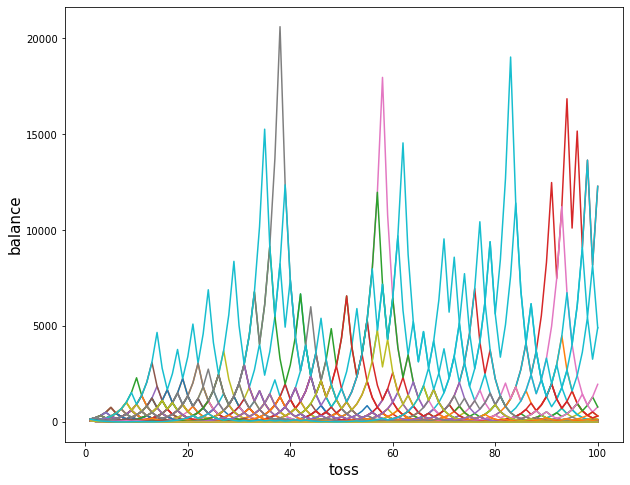

After 100 tosses, there are 18 gamblers have more than their initial 100$.


In [16]:
bal_df = game.iloc[:,-100:]     #select balance columns as df

plt.figure(figsize=(10,8))

for i in range(1,101):     #for each gambler, plot a line with their balance valus
    plt.plot(np.arange(1,101),bal_df.loc[i,:])

plt.ylabel('balance',fontsize=15)
plt.xlabel('toss',fontsize=15)
plt.show()

win = game['balance_100']> 100       #how many gamblers get >100 after 100 tosses?
print("After 100 tosses, there are {} gamblers have more than their initial 100$.".format(win.sum()))

In [17]:
# increase N to 1,000 

game_add = pd.DataFrame(np.random.rand(100,900))   #more toss need: (1000 - original 100)=900 tosses
game_add.index += 1         # begin the index with 1,for a better joinning of dfs lator
game_add.columns += 101     # begin the probability column with 101
game_add = game_add.add_prefix('prob_').rename_axis('gambler_w',axis='rows').rename_axis('toss_N',axis='columns')

game_1000 = game_tem.join(game_add)     
game_1000['balance_0']=100    #add temperary balance_0=100

bal_1000=['balance_'+ str(x) for x in range(0,1001)]
game_1000[bal_1000]=100         #add balance 0-1000 as columns, set 100$, modified later

for w in game_1000.index:
    for N in range(1,1001):
        if game_1000.loc[w,'prob_'+str(N)]>=0.5:
            game_1000.loc[w,'balance_'+str(N)]=1.5 * game_1000.loc[w,'balance_'+str(N-1)]
        else:
            game_1000.loc[w,'balance_'+str(N)]=0.6 * game_1000.loc[w,'balance_'+str(N-1)]

game_1000 = game_1000.drop('balance_0', axis=1)
game_1000     #get the df of N=1000

toss_N,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,prob_10,...,balance_991,balance_992,balance_993,balance_994,balance_995,balance_996,balance_997,balance_998,balance_999,balance_1000
gambler_w,,,,,,,,,,,,,,,,,,,,,
1,0.971408,0.978619,0.850095,0.342825,0.768407,0.392676,0.590333,0.415693,0.007533,0.187535,...,8.803865e-25,1.320580e-24,7.923478e-25,4.754087e-25,7.131130e-25,4.278678e-25,2.567207e-25,3.850810e-25,5.776216e-25,8.664323e-25
2,0.148554,0.444627,0.983500,0.406556,0.577578,0.317175,0.826479,0.892966,0.389841,0.796557,...,8.007068e-17,4.804241e-17,2.882545e-17,4.323817e-17,6.485725e-17,3.891435e-17,2.334861e-17,1.400917e-17,2.101375e-17,1.260825e-17
3,0.866992,0.882218,0.691052,0.893298,0.966058,0.095318,0.026730,0.858469,0.021537,0.720340,...,1.281131e-17,7.686785e-18,1.153018e-17,6.918107e-18,1.037716e-17,1.556574e-17,9.339444e-18,1.400917e-17,8.405500e-18,1.260825e-17
4,0.821951,0.419606,0.739167,0.904389,0.870368,0.808843,0.299947,0.550917,0.902126,0.360876,...,7.819403e-15,1.172910e-14,1.759366e-14,2.639048e-14,3.958573e-14,2.375144e-14,3.562715e-14,2.137629e-14,3.206444e-14,4.809666e-14
5,0.495632,0.000268,0.297305,0.276278,0.247396,0.109505,0.985847,0.261626,0.289668,0.255978,...,1.548792e-33,2.323188e-33,1.393913e-33,2.090870e-33,1.254522e-33,1.881783e-33,1.129070e-33,6.774417e-34,4.064650e-34,2.438790e-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.064468,0.294384,0.771262,0.321201,0.508186,0.155667,0.452523,0.428054,0.579401,0.772443,...,2.307880e-28,3.461820e-28,2.077092e-28,3.115638e-28,4.673458e-28,7.010186e-28,4.206112e-28,2.523667e-28,3.785501e-28,5.678251e-28
97,0.279436,0.147001,0.492233,0.569842,0.529369,0.391443,0.802097,0.860267,0.059891,0.851612,...,2.200966e-24,3.301449e-24,1.980870e-24,1.188522e-24,7.131130e-25,1.069670e-24,1.604504e-24,9.627026e-25,1.444054e-24,2.166081e-24
98,0.808164,0.989972,0.474745,0.375457,0.817904,0.903823,0.831755,0.801762,0.094498,0.581606,...,1.137873e-07,1.706809e-07,1.024086e-07,1.536128e-07,9.216770e-08,1.382515e-07,2.073773e-07,3.110660e-07,1.866396e-07,2.799594e-07


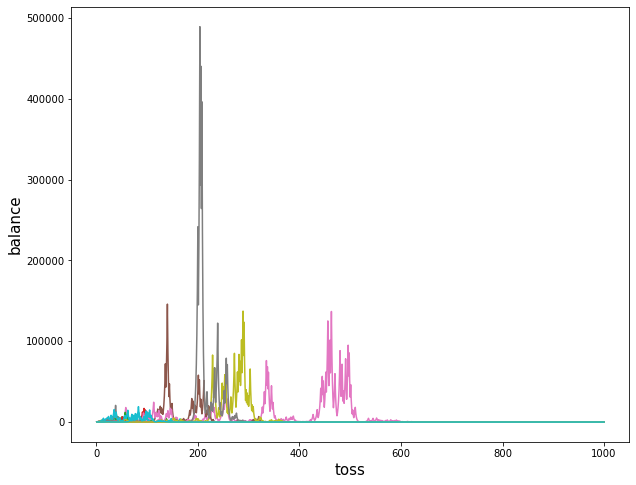

After 1000 tosses, there are 0 out of 100 gamblers have more than their initial 100$.


In [18]:
# How many gamblers get more than $100 after N=1000 tosses?
bal_1000 = game_1000.iloc[:,-1000:]

plt.figure(figsize=(10,8))

for i in range(1,101):
    plt.plot(np.arange(1,1001),bal_1000.loc[i,:])

plt.ylabel('balance',fontsize=15)
plt.xlabel('toss',fontsize=15)
plt.show()

win_too = bal_1000['balance_1000']> 100
print("After 1000 tosses, there are {} out of 100 gamblers have more than their initial 100$.".format(win_too.sum()))

# 2.3.5
Plot time trajectories of the mean and median wealth at every time point from 0 to 1,000.

Try both linear and logarithmic scaler for the wealth axis.

Text(0.5, 1.0, 'log')

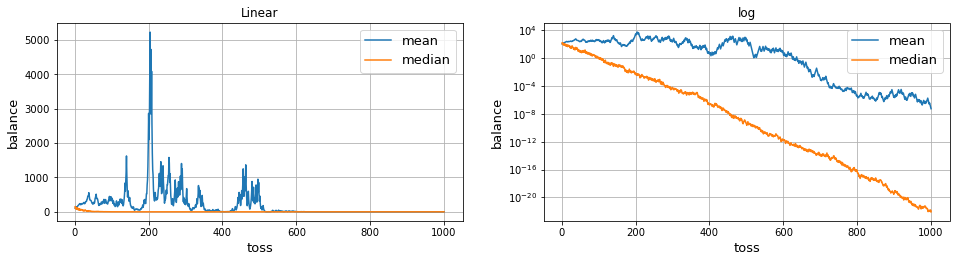

In [19]:
plt.figure(figsize=(16,8))
x=np.arange(1,1001)
y_mean=bal_1000.mean(axis=0)
y_median=bal_1000.median(axis=0)

# linear
plt.subplot(221)
plt.plot(x, y_mean,label='mean')
plt.plot(x, y_median, label = 'median')
plt.yscale('linear')
plt.legend(fontsize=13)
plt.xlabel('toss',fontsize=13)
plt.ylabel('balance',fontsize=13)
plt.grid(True)
plt.title("Linear")

# log
plt.subplot(222)
plt.plot(x, y_mean,label='mean')
plt.plot(x, y_median, label = 'median')
plt.yscale('log')
plt.xlabel('toss',fontsize=13)
plt.ylabel('balance',fontsize=13)
plt.legend(fontsize=13)
plt.grid(True)
plt.title('log')

With linear scaler for the wealth axis, we could see little change of the median, as it declined to 0 and the state was continued to the end of the 1000 tosses, but the mean value of the balance was fluctuate a lot until approximately 500 tosses. With the help of the logarithmic scaler, we could see the medain value of the balance declined almost strictly from N=1 to 1000 tosses, as the change of mean was not clear, but generally showed a decreasing tendency as N approched to 1000. 

So we could say a gambler would be more likeily to lose money as the toss times approached to 1000. And from the second plot, the mean value was larger than the median for each point of toss, indicating the small group of gamblers who are quite lucky may affect the mean wealth of the whole group, but half of the gamblers would loose money after 100 tosses approximately, according to the observation that median=10^0 when toss=100 with log scaler.

# 2.3.6 New Game

In [20]:
#new game N=10 tosses, w=1000 gamblers, step3

new_tem = pd.DataFrame(np.random.rand(1000,10))
new_tem.index += 1 
new_tem.columns += 1
new_tem = new_tem.add_prefix('prob_').rename_axis('gambler_w',axis='rows').rename_axis('toss_N',axis='columns')
new_tem

new=new_tem.copy()
new_bal=['balance_'+ str(x) for x in range(1,11)]
new[new_bal]=100
new

new['balance_0']=100          #set a temperary initial balance column with value 100
for w in new.index:
    for N in range(1,11):
        if new.loc[w,'prob_'+str(N)]>=0.5:
            new.loc[w,'balance_'+str(N)]= 50 + new.loc[w,'balance_'+str(N-1)]
        else:
            new.loc[w,'balance_'+str(N)]= -40 + new.loc[w,'balance_'+str(N-1)]
            
new = new.drop('balance_0', axis=1)
new                 #get df of N=10 tosses and w=1000 gamblers

toss_N,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,prob_10,balance_1,balance_2,balance_3,balance_4,balance_5,balance_6,balance_7,balance_8,balance_9,balance_10
gambler_w,,,,,,,,,,,,,,,,,,,,
1,0.022587,0.228896,0.289375,0.804750,0.715678,0.671866,0.398634,0.467353,0.206173,0.528751,60,20,-20,30,80,130,90,50,10,60
2,0.770129,0.059145,0.066529,0.071218,0.496916,0.284798,0.535342,0.954824,0.148978,0.174852,150,110,70,30,-10,-50,0,50,10,-30
3,0.650479,0.305369,0.203544,0.563403,0.064015,0.770958,0.219844,0.397769,0.133117,0.853185,150,110,70,120,80,130,90,50,10,60
4,0.913967,0.015383,0.911166,0.263262,0.559273,0.222130,0.639215,0.857212,0.364053,0.080230,150,110,160,120,170,130,180,230,190,150
5,0.907498,0.545621,0.743441,0.657272,0.497671,0.066298,0.435879,0.379982,0.820391,0.335549,150,200,250,300,260,220,180,140,190,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.233812,0.394941,0.699837,0.445895,0.917062,0.409674,0.903390,0.195105,0.659217,0.760622,60,20,70,30,80,40,90,50,100,150
997,0.329251,0.898947,0.325541,0.486142,0.221851,0.564631,0.502931,0.355995,0.813801,0.916083,60,110,70,30,-10,40,90,50,100,150
998,0.950732,0.037631,0.192253,0.614523,0.801674,0.741034,0.829870,0.889690,0.157987,0.285772,150,110,70,120,170,220,270,320,280,240


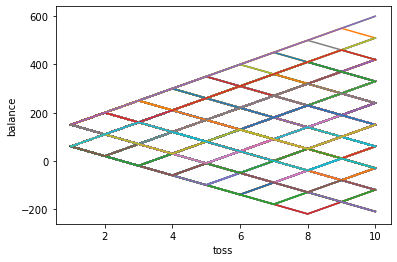

After 10 tosses of the new game, there are 593 out of 1000 gamblers have more than their initial 100$.


In [21]:
#new game,step 4

new_bal = new.iloc[:,-10:]

plt.figure()

for i in range(1,1001):
    plt.plot(np.arange(1,11),new_bal.loc[i,:])

plt.ylabel('balance')
plt.xlabel('toss')
plt.show()

win = new_bal['balance_10']> 100
print("After 10 tosses of the new game, there are {} out of 1000 gamblers have more than their initial 100$.".format(win.sum()))

In [22]:
#new game,step 4, increase N to 1,000 

new_add = pd.DataFrame(np.random.rand(1000,990))
new_add.index += 1 
new_add.columns += 11
new_add = new_add.add_prefix('prob_').rename_axis('gambler_w',axis='rows').rename_axis('toss_N',axis='columns')


new_1000 = new_tem.join(new_add)
new_1000['balance_0']=100    #add temperary balance_0=100

bal_1000=['balance_'+ str(x) for x in range(0,1001)]
new_1000[bal_1000]=100         #add balance 0-1000 as columns, set default 100$, modified later

for w in new_1000.index:
    for N in range(1,1001):
        if new_1000.loc[w,'prob_'+str(N)]>=0.5:
            new_1000.loc[w,'balance_'+str(N)]=50+ new_1000.loc[w,'balance_'+str(N-1)]
        else:
            new_1000.loc[w,'balance_'+str(N)]=-40+ new_1000.loc[w,'balance_'+str(N-1)]

new_1000 = new_1000.drop('balance_0', axis=1)
new_1000   #get the df with w=1000 gamblers and N=1000 tosses

toss_N,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,prob_10,...,balance_991,balance_992,balance_993,balance_994,balance_995,balance_996,balance_997,balance_998,balance_999,balance_1000
gambler_w,,,,,,,,,,,,,,,,,,,,,
1,0.022587,0.228896,0.289375,0.804750,0.715678,0.671866,0.398634,0.467353,0.206173,0.528751,...,6000,5960,6010,6060,6110,6160,6120,6080,6040,6090
2,0.770129,0.059145,0.066529,0.071218,0.496916,0.284798,0.535342,0.954824,0.148978,0.174852,...,5280,5240,5200,5160,5210,5170,5220,5270,5230,5280
3,0.650479,0.305369,0.203544,0.563403,0.064015,0.770958,0.219844,0.397769,0.133117,0.853185,...,5550,5600,5650,5610,5570,5530,5490,5450,5500,5550
4,0.913967,0.015383,0.911166,0.263262,0.559273,0.222130,0.639215,0.857212,0.364053,0.080230,...,6360,6410,6370,6330,6380,6340,6300,6260,6310,6360
5,0.907498,0.545621,0.743441,0.657272,0.497671,0.066298,0.435879,0.379982,0.820391,0.335549,...,5640,5600,5560,5520,5570,5530,5490,5450,5410,5370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.233812,0.394941,0.699837,0.445895,0.917062,0.409674,0.903390,0.195105,0.659217,0.760622,...,4650,4610,4570,4620,4580,4540,4500,4460,4510,4470
997,0.329251,0.898947,0.325541,0.486142,0.221851,0.564631,0.502931,0.355995,0.813801,0.916083,...,6540,6500,6550,6600,6560,6610,6660,6710,6670,6630
998,0.950732,0.037631,0.192253,0.614523,0.801674,0.741034,0.829870,0.889690,0.157987,0.285772,...,3210,3260,3310,3360,3410,3460,3420,3470,3430,3390


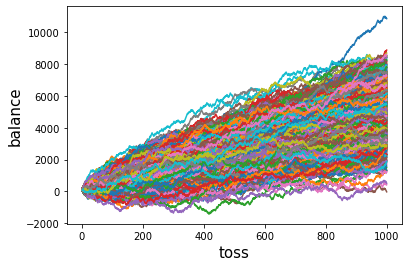

After 1000 tosses, there are 999 out of 1000 gamblers have more than their initial 100$.


In [23]:
new_bal_1000 = new_1000.iloc[:,-1000:]

for i in range(1,1001):
    plt.plot(np.arange(1,1001),new_bal_1000.loc[i,:])
plt.ylabel('balance',fontsize=15)
plt.xlabel('toss',fontsize=15)
plt.show()

new_win_too = new_bal_1000['balance_1000']> 100
print("After 1000 tosses, there are {} out of 1000 gamblers have more than their initial 100$.".format(new_win_too.sum()))

Text(0.5, 1.0, 'log')

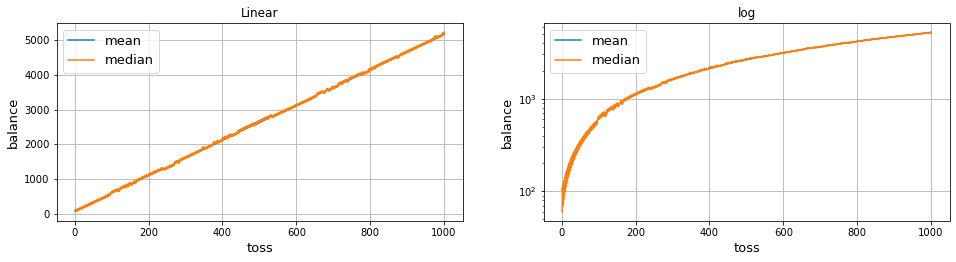

In [24]:
# New game, step 5

plt.figure(figsize=(16,8))
x=np.arange(1,1001)
y_mean=new_bal_1000.mean(axis=0)
y_median=new_bal_1000.median(axis=0)

# linear
plt.subplot(221)
plt.plot(x, y_mean,label='mean')
plt.plot(x, y_median, label = 'median')
plt.yscale('linear')
plt.legend(fontsize=13)
plt.xlabel('toss',fontsize=13)
plt.ylabel('balance',fontsize=13)
plt.grid(True)
plt.title("Linear")

# log
plt.subplot(222)
plt.plot(x, y_mean,label='mean')
plt.plot(x, y_median, label = 'median')
plt.yscale('log')
plt.xlabel('toss',fontsize=13)
plt.ylabel('balance',fontsize=13)
plt.legend(fontsize=13)
plt.grid(True)
plt.title('log')


The mean value of the balance was similar to the median balance for each times of tosses from 1 to 1000, so the gambler could predict their wealth better in this game. 

Compared to the last game, the gambler would have much more chance to win money, as tosses increased here. So choose this one if you wanna win.